In [48]:
from tqdm import tqdm
import matplotlib as plt
import pandas as pd
from bioservices import KEGG
import mygene
import requests
import gseapy as gp

# Chimp and Human

In [29]:
df_dge = pd.read_csv("data/deg.tsv", sep="\t", index_col=0)
df_dge.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,neg_log10_padj
A2M,23352.981363,1.001859,0.119977,8.350429,6.801527e-17,9.016720e-16,15.044951
A2ML1,9.441367,1.797427,0.350961,5.121444,3.032048e-07,1.305004e-06,5.884388
A4GALT,3270.724476,-0.072624,0.105666,-0.687291,4.918994e-01,5.679585e-01,0.245683
AAAS,1295.914864,0.241341,0.138216,1.746116,8.079087e-02,1.191748e-01,0.923816
AACS,679.559126,0.207555,0.100429,2.066677,3.876463e-02,6.247558e-02,1.204290


In [30]:
len(df_dge)

14397

In [31]:
log2FC_threshold = 1  
padj_threshold = 0.05  

df_dge_filtered = df_dge[(df_dge['padj'] < padj_threshold) & (abs(df_dge['log2FoldChange']) > log2FC_threshold)]

df_dge_filtered.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,neg_log10_padj
A2M,23352.981363,1.001859,0.119977,8.350429,6.801527e-17,9.016720e-16,15.044951
A2ML1,9.441367,1.797427,0.350961,5.121444,3.032048e-07,1.305004e-06,5.884388
AASDHPPT,1444.391246,-1.027125,0.118074,-8.699010,3.347927e-18,4.974211e-17,16.303276
ABAT,507.885117,3.633504,0.243111,14.945861,1.657358e-50,1.463864e-48,47.834499
ABCB1,197.112805,1.043519,0.242830,4.297327,1.728705e-05,5.639737e-05,4.248741


In [32]:
len(df_dge_filtered)

2816

In [8]:
len(df_dge_filtered)

3426

2024-11-02 02:38:59,451 [WARNING] Duplicated values found in preranked stats: 0.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


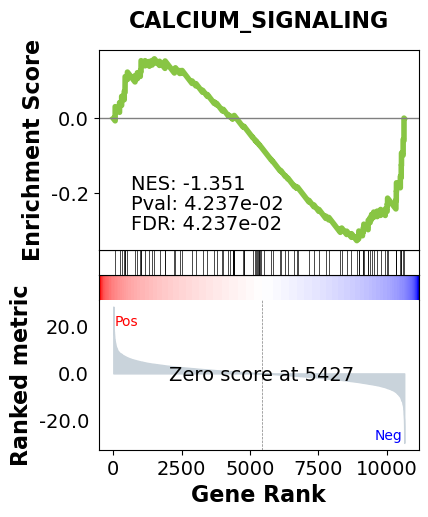

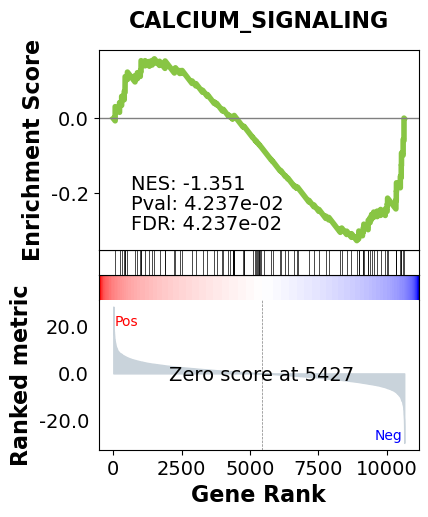

In [47]:
with open("data/CALCIUM_SIGNALING.txt") as f:
    line = f.readline().strip()  
    kras_genes = line.split('\t')  
    kras_genes = [gene.upper() for gene in kras_genes] 

df_dge.index = df_dge.index.str.upper()
ranked_genes = df_dge['stat'].sort_values(ascending=False)

gene_sets = {'CALCIUM_SIGNALING': kras_genes}

gsea_results = gp.prerank(rnk=ranked_genes, gene_sets=gene_sets, outdir=None, min_size=10, max_size=1000, show=False)

gsea_results.plot(terms="CALCIUM_SIGNALING")

In [43]:
import gseapy as gp

# Список дифференциально экспрессируемых генов
differential_genes = df_dge_filtered.index.tolist()

# Выполнение анализа обогащения по базе данных KEGG
enrichr_results = gp.enrichr(gene_list=differential_genes,
                             gene_sets='KEGG_2021_Human',  # Можно заменить на 'Reactome_2021' или 'BioCarta'
                             organism='Human',
                             outdir=None)

# Просмотр значимых сигнальных путей
significant_pathways = enrichr_results.results[enrichr_results.results['Adjusted P-value'] < 0.05]
significant_pathways[['Term', 'Adjusted P-value', 'Genes']]


                                                Term  Adjusted P-value  \
0                           ECM-receptor interaction          0.000034   
1             Cytokine-cytokine receptor interaction          0.002961   
2                          Calcium signaling pathway          0.007737   
3                   Protein digestion and absorption          0.008217   
4                                 Nicotine addiction          0.012196   
5  Viral protein interaction with cytokine and cy...          0.021387   
6                                 Morphine addiction          0.025981   
7                         Hematopoietic cell lineage          0.033296   
8            Neuroactive ligand-receptor interaction          0.042486   
9                                     Focal adhesion          0.049902   

                                               Genes  
0  ITGB1;LAMA5;LAMC3;LAMA1;ITGB3;TNC;LAMC2;THBS1;...  
1  ACVRL1;CNTFR;IL1RN;CSF3;CSF3R;CXCL1;FASLG;TNFR...  
2  RYR1;MYLK2;ATP2A1

In [44]:
significant_pathways[['Term', 'Adjusted P-value', 'Genes']]

,Term,Adjusted P-value,Genes
0,ECM-receptor interaction,0.000034,ITGB1;LAMA5;LAMC3;LAMA1;ITGB3;TNC;LAMC2;THBS1;...
1,Cytokine-cytokine receptor interaction,0.002961,ACVRL1;CNTFR;IL1RN;CSF3;CSF3R;CXCL1;FASLG;TNFR...
2,Calcium signaling pathway,0.007737,RYR1;MYLK2;ATP2A1;FGF1;GRM1;MYLK4;EDNRB;BDKRB2...
3,Protein digestion and absorption,0.008217,COL17A1;CPB1;COL13A1;COL14A1;COL11A2;ATP1A4;AT...
4,Nicotine addiction,0.012196,GABRB3;GABRP;GABRB1;GABRA4;CACNA1B;GRIN2C;GABR...
5,Viral protein interaction with cytokine and cy...,0.021387,CCL14;CX3CR1;CCL11;IL20RA;IL20RB;CXCL1;CXCL14;...
6,Morphine addiction,0.025981,GABRB3;GABBR2;GABRP;GABRB1;PRKCB;GABRA4;CACNA1...
7,Hematopoietic cell lineage,0.033296,CSF3;HLA-DRB5;CSF3R;ITGAM;IL1R2;ITGB3;ITGA2;CD...
8,Neuroactive ligand-receptor interaction,0.042486,GABRB3;GABRB1;SCT;GRM1;LTB4R;GABRR2;GRM2;EDNRB...
9,Focal adhesion,0.049902,ITGB1;MYLK2;LAMA5;SHC2;SHC3;LAMC3;LAMA1;ITGB3;...


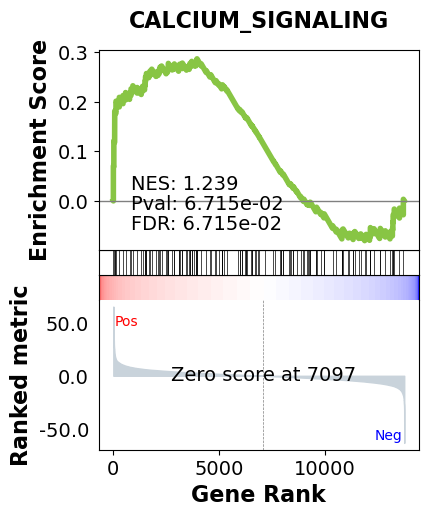

In [48]:
import gseapy as gp
import matplotlib.pyplot as plt

# Если 'ranked_genes' содержит ранжированный список генов, отобразим GSEA plot
gsea_results = gp.prerank(rnk=ranked_genes, gene_sets={'CALCIUM_SIGNALING': kras_genes}, outdir=None)

# Построение GSEA plot
gsea_results.plot(terms="CALCIUM_SIGNALING")
plt.show()


# Macaca and Chimp

In [43]:
df_dge = pd.read_csv("data/deg_macaca.tsv", sep="\t", index_col=0)
df_dge.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,neg_log10_padj,in_calcium_signaling
A1BG,97.456679,-0.028939,0.853232,-0.033917,9.729431e-01,9.820664e-01,0.007859,False
A2M,13564.292848,1.126481,0.233177,4.831002,1.358478e-06,6.638047e-06,5.177960,False
A4GALT,2383.369170,-2.177444,0.166417,-13.084234,4.052268e-39,3.557624e-37,36.448840,False
AAAS,663.611132,1.202683,0.170222,7.065400,1.601540e-12,1.915896e-11,10.717628,False
AACS,216.479443,-0.384372,0.253485,-1.516348,1.294314e-01,1.961848e-01,0.707335,False


In [44]:
len(df_dge)

10640

In [45]:
log2FC_threshold = 1  
padj_threshold = 0.05  

df_dge_filtered = df_dge[(df_dge['padj'] < padj_threshold) & (abs(df_dge['log2FoldChange']) > log2FC_threshold)]

df_dge_filtered.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,neg_log10_padj,in_calcium_signaling
A2M,13564.292848,1.126481,0.233177,4.831002,1.358478e-06,6.638047e-06,5.177960,False
A4GALT,2383.369170,-2.177444,0.166417,-13.084234,4.052268e-39,3.557624e-37,36.448840,False
AAAS,663.611132,1.202683,0.170222,7.065400,1.601540e-12,1.915896e-11,10.717628,False
AADAT,151.324201,1.178440,0.296363,3.976341,6.998379e-05,2.431920e-04,3.614051,False
AAK1,1525.747197,-2.091865,0.301528,-6.937557,3.989382e-12,4.465670e-11,10.350113,False


In [46]:
len(df_dge_filtered)

2681

2024-11-02 02:40:31,268 [WARNING] Duplicated values found in preranked stats: 0.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


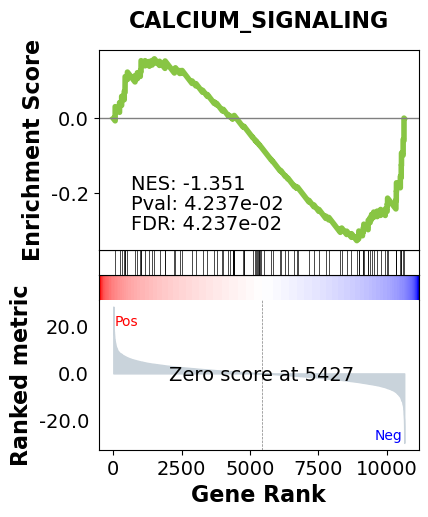

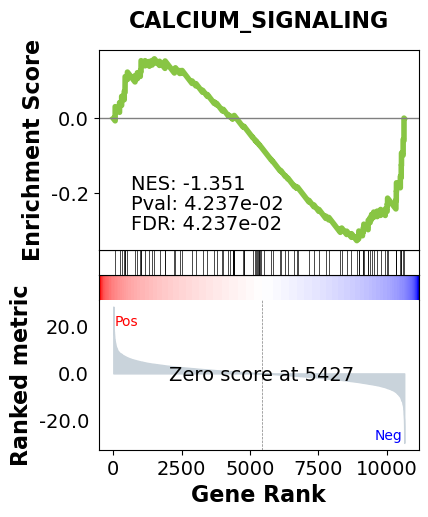

In [49]:
with open("data/CALCIUM_SIGNALING.txt") as f:
    line = f.readline().strip()  
    kras_genes = line.split('\t')  
    kras_genes = [gene.upper() for gene in kras_genes] 

df_dge.index = df_dge.index.str.upper()
ranked_genes = df_dge['stat'].sort_values(ascending=False)

gene_sets = {'CALCIUM_SIGNALING': kras_genes}

gsea_results = gp.prerank(rnk=ranked_genes, gene_sets=gene_sets, outdir=None, min_size=10, max_size=1000, show=False)

gsea_results.plot(terms="CALCIUM_SIGNALING")